In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/src")
import helpers as hlp

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load & Merge CSV Data for All Cities

In [71]:
data_dir = '../data/OpinRankDatasetWithJudgments/hotels/data/'

In [72]:
csv_filenames = hlp.find_filenames(data_dir, suffix='.csv')
csv_filenames

['dubai.csv',
 'new-delhi.csv',
 'new-york-city.csv',
 'san-francisco.csv',
 'las-vegas.csv',
 'chicago.csv',
 'shanghai.csv',
 'montreal.csv',
 'beijing.csv',
 'london.csv']

In [73]:
len(csv_filenames)

10

In [74]:
dfs = []
for name in csv_filenames:
    dfs.append(pd.read_csv(data_dir + name))
df_all_cities = pd.concat(dfs, ignore_index=True)

# Train-Test Split - *Move to before/after EDA?*

In [75]:
target = 'overall_ratingsource'
df = df_all_cities
y = df[target].to_numpy()
X = df.drop(columns=[target]).to_numpy()

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Data Cleaning

In [77]:
df_all_cities.head()

,doc_id,hotel_name,hotel_url,street,city,state,country,zip,class,price,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,COMFORT,overall_ratingsource
0,grosvenor house west marina beach by le meridi...,http://www.tripadvisor.com/ShowUserReviews-g29...,al sofouh road,dubai,-1,ARE,8500,-1,-1,299,4.900862,4.810345,4.814655,4.202586,4.560345,0.0,4.657759,NaN
1,mina a salam at madinat jumeirah,http://www.tripadvisor.com/ShowUserReviews-g29...,p.o. box 75157,dubai,-1,ARE,-1,-1,-1,425,4.918367,4.826531,4.724490,4.880952,4.326531,0.0,4.735374,NaN
2,al manzil hotel,http://www.tripadvisor.com/ShowUserReviews-g29...,burj dubai,dubai,-1,ARE,-1,-1,-1,129,4.914530,4.649573,4.786325,4.341880,4.632479,0.0,4.664957,NaN
3,le royal meridien beach resort spa,http://www.tripadvisor.com/ShowUserReviews-g29...,al sofouh road,dubai,-1,ARE,24970,-1,-1,320,4.913621,4.714286,4.877076,4.694352,4.328904,0.0,4.705648,NaN
4,dar al masyaf at madinat jumeirah,http://www.tripadvisor.com/ShowUserReviews-g29...,madinat jumeirah resort,dubai,-1,ARE,75157,-1,-1,213,4.951220,4.890244,4.664634,4.847561,4.402439,0.0,4.751220,NaN


In [78]:
df_all_cities.tail()

,doc_id,hotel_name,hotel_url,street,city,state,country,zip,class,price,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,COMFORT,overall_ratingsource
3100,uk_england_london_whiteleaf_hotel,whiteleaf hotel,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,w2 3lb,-1,-1,70.0,1.395833,1.312500,1.541667,3.333333,1.541667,0.0,1.825000
3101,uk_england_london_the_continental_hotel,the continental hotel,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,w2 1rt,-1,-1,9.0,1.000000,1.000000,1.111111,2.111111,1.000000,0.0,1.244444
3102,uk_england_london_regency_court_hotel,regency court hotel,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,sw5 9st,-1,-1,21.0,1.307692,1.230769,1.307692,3.461538,1.307692,0.0,1.723077
3103,uk_england_london_earls_court_gardens_hotel,earls court gardens hotel,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,sw5 0tr,-1,-1,19.0,1.285714,1.142857,1.714286,2.928571,1.285714,0.0,1.671429
3104,uk_england_london_four_seasons_hotel_london_cu...,four seasons hotel london currently closed,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,w1j 7dr,-1,-1,36.0,4.625000,3.875000,4.437500,4.687500,3.625000,0.0,4.250000


In [79]:
df_all_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3105 entries, 0 to 3104
Data columns (total 18 columns):
doc_id                  3105 non-null object
hotel_name              3105 non-null object
hotel_url               3105 non-null object
street                  3105 non-null object
city                    3105 non-null object
state                   3105 non-null object
country                 3105 non-null object
zip                     3105 non-null object
class                   3105 non-null object
price                   3105 non-null int64
num_reviews             3105 non-null float64
CLEANLINESS             3105 non-null float64
ROOM                    3105 non-null float64
SERVICE                 3105 non-null float64
LOCATION                3105 non-null float64
VALUE                   3105 non-null float64
COMFORT                 3105 non-null float64
overall_ratingsource    995 non-null float64
dtypes: float64(8), int64(1), object(9)
memory usage: 436.8+ KB


In [80]:
hlp.get_nulls(df_all_cities)

,Total,Percent,Type
overall_ratingsource,2110,0.679549,float64
COMFORT,0,0.000000,float64
hotel_name,0,0.000000,object
hotel_url,0,0.000000,object
street,0,0.000000,object
city,0,0.000000,object
state,0,0.000000,object
country,0,0.000000,object
zip,0,0.000000,object
class,0,0.000000,object


## Fix rows with null overall_ratingsource (need to shift columns by 1 to the right)

In [87]:
df_all_cities_shifted = df_all_cities[df_all_cities['overall_ratingsource'].isna()].copy()

In [88]:
df_all_cities_shifted.head()

,doc_id,hotel_name,hotel_url,street,city,state,country,zip,class,price,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,COMFORT,overall_ratingsource
0,grosvenor house west marina beach by le meridi...,http://www.tripadvisor.com/ShowUserReviews-g29...,al sofouh road,dubai,-1,ARE,8500,-1,-1,299,4.900862,4.810345,4.814655,4.202586,4.560345,0.0,4.657759,NaN
1,mina a salam at madinat jumeirah,http://www.tripadvisor.com/ShowUserReviews-g29...,p.o. box 75157,dubai,-1,ARE,-1,-1,-1,425,4.918367,4.826531,4.724490,4.880952,4.326531,0.0,4.735374,NaN
2,al manzil hotel,http://www.tripadvisor.com/ShowUserReviews-g29...,burj dubai,dubai,-1,ARE,-1,-1,-1,129,4.914530,4.649573,4.786325,4.341880,4.632479,0.0,4.664957,NaN
3,le royal meridien beach resort spa,http://www.tripadvisor.com/ShowUserReviews-g29...,al sofouh road,dubai,-1,ARE,24970,-1,-1,320,4.913621,4.714286,4.877076,4.694352,4.328904,0.0,4.705648,NaN
4,dar al masyaf at madinat jumeirah,http://www.tripadvisor.com/ShowUserReviews-g29...,madinat jumeirah resort,dubai,-1,ARE,75157,-1,-1,213,4.951220,4.890244,4.664634,4.847561,4.402439,0.0,4.751220,NaN


In [89]:
new_cols = list(df_all_cities_shifted.columns)
new_cols.remove('hotel_name')
new_cols.append('drop')
new_cols

['doc_id',
 'hotel_url',
 'street',
 'city',
 'state',
 'country',
 'zip',
 'class',
 'price',
 'num_reviews',
 'CLEANLINESS',
 'ROOM',
 'SERVICE',
 'LOCATION',
 'VALUE',
 'COMFORT',
 'overall_ratingsource',
 'drop']

In [90]:
df_all_cities_shifted.columns = new_cols
df_all_cities_shifted.head()

,doc_id,hotel_url,street,city,state,country,zip,class,price,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,COMFORT,overall_ratingsource,drop
0,grosvenor house west marina beach by le meridi...,http://www.tripadvisor.com/ShowUserReviews-g29...,al sofouh road,dubai,-1,ARE,8500,-1,-1,299,4.900862,4.810345,4.814655,4.202586,4.560345,0.0,4.657759,NaN
1,mina a salam at madinat jumeirah,http://www.tripadvisor.com/ShowUserReviews-g29...,p.o. box 75157,dubai,-1,ARE,-1,-1,-1,425,4.918367,4.826531,4.724490,4.880952,4.326531,0.0,4.735374,NaN
2,al manzil hotel,http://www.tripadvisor.com/ShowUserReviews-g29...,burj dubai,dubai,-1,ARE,-1,-1,-1,129,4.914530,4.649573,4.786325,4.341880,4.632479,0.0,4.664957,NaN
3,le royal meridien beach resort spa,http://www.tripadvisor.com/ShowUserReviews-g29...,al sofouh road,dubai,-1,ARE,24970,-1,-1,320,4.913621,4.714286,4.877076,4.694352,4.328904,0.0,4.705648,NaN
4,dar al masyaf at madinat jumeirah,http://www.tripadvisor.com/ShowUserReviews-g29...,madinat jumeirah resort,dubai,-1,ARE,75157,-1,-1,213,4.951220,4.890244,4.664634,4.847561,4.402439,0.0,4.751220,NaN


In [91]:
df_all_cities_shifted.drop(columns=['drop'], inplace=True)
df_all_cities_shifted.head()

,doc_id,hotel_url,street,city,state,country,zip,class,price,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,COMFORT,overall_ratingsource
0,grosvenor house west marina beach by le meridi...,http://www.tripadvisor.com/ShowUserReviews-g29...,al sofouh road,dubai,-1,ARE,8500,-1,-1,299,4.900862,4.810345,4.814655,4.202586,4.560345,0.0,4.657759
1,mina a salam at madinat jumeirah,http://www.tripadvisor.com/ShowUserReviews-g29...,p.o. box 75157,dubai,-1,ARE,-1,-1,-1,425,4.918367,4.826531,4.724490,4.880952,4.326531,0.0,4.735374
2,al manzil hotel,http://www.tripadvisor.com/ShowUserReviews-g29...,burj dubai,dubai,-1,ARE,-1,-1,-1,129,4.914530,4.649573,4.786325,4.341880,4.632479,0.0,4.664957
3,le royal meridien beach resort spa,http://www.tripadvisor.com/ShowUserReviews-g29...,al sofouh road,dubai,-1,ARE,24970,-1,-1,320,4.913621,4.714286,4.877076,4.694352,4.328904,0.0,4.705648
4,dar al masyaf at madinat jumeirah,http://www.tripadvisor.com/ShowUserReviews-g29...,madinat jumeirah resort,dubai,-1,ARE,75157,-1,-1,213,4.951220,4.890244,4.664634,4.847561,4.402439,0.0,4.751220


## Get rows with non-null overall ratings (unshifted data)

In [93]:
df_all_cities_wratings = df_all_cities.copy()

In [94]:
df_all_cities_wratings = df_all_cities_wratings[~df_all_cities_wratings['overall_ratingsource'].isna()].copy()

In [95]:
df_all_cities_wratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995 entries, 2110 to 3104
Data columns (total 18 columns):
doc_id                  995 non-null object
hotel_name              995 non-null object
hotel_url               995 non-null object
street                  995 non-null object
city                    995 non-null object
state                   995 non-null object
country                 995 non-null object
zip                     995 non-null object
class                   995 non-null object
price                   995 non-null int64
num_reviews             995 non-null float64
CLEANLINESS             995 non-null float64
ROOM                    995 non-null float64
SERVICE                 995 non-null float64
LOCATION                995 non-null float64
VALUE                   995 non-null float64
COMFORT                 995 non-null float64
overall_ratingsource    995 non-null float64
dtypes: float64(8), int64(1), object(9)
memory usage: 147.7+ KB


In [96]:
df_all_cities_wratings.head()

,doc_id,hotel_name,hotel_url,street,city,state,country,zip,class,price,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,COMFORT,overall_ratingsource
2110,uk_england_london_the_milestone_hotel,the milestone hotel,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,w8 5dl,-1,-1,175.0,4.897638,4.779528,4.913386,4.779528,4.503937,0.0,4.774803
2111,uk_england_london_the_soho_hotel,the soho hotel,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,w1d 3dh,-1,-1,209.0,4.958824,4.894118,4.764706,4.817647,4.329412,0.0,4.752941
2112,uk_england_london_hotel_41,hotel 41,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,sw1w 0ps,-1,-1,323.0,4.871681,4.592920,4.858407,4.623894,4.367257,0.0,4.662832
2113,uk_england_london_sofitel_st_james_london,sofitel st james london,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,sw1y 4an,-1,-1,379.0,4.816406,4.597656,4.585938,4.867188,4.257812,0.0,4.625000
2114,uk_england_london_the_halkin,the halkin,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,sw1x 7dj,-1,-1,65.0,4.923077,4.666667,4.615385,4.615385,4.179487,0.0,4.600000


In [97]:
df_all_cities_wratings['city'].unique()

array(['london'], dtype=object)

## Merge shifted data and unshifted data

In [99]:
df_all_cities_cleaned = pd.concat([df_all_cities_wratings, df_all_cities_shifted], ignore_index=True, sort=False)

In [100]:
df_all_cities_cleaned.head()

,doc_id,hotel_name,hotel_url,street,city,state,country,zip,class,price,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,COMFORT,overall_ratingsource
0,uk_england_london_the_milestone_hotel,the milestone hotel,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,w8 5dl,-1,-1,175.0,4.897638,4.779528,4.913386,4.779528,4.503937,0.0,4.774803
1,uk_england_london_the_soho_hotel,the soho hotel,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,w1d 3dh,-1,-1,209.0,4.958824,4.894118,4.764706,4.817647,4.329412,0.0,4.752941
2,uk_england_london_hotel_41,hotel 41,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,sw1w 0ps,-1,-1,323.0,4.871681,4.592920,4.858407,4.623894,4.367257,0.0,4.662832
3,uk_england_london_sofitel_st_james_london,sofitel st james london,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,sw1y 4an,-1,-1,379.0,4.816406,4.597656,4.585938,4.867188,4.257812,0.0,4.625000
4,uk_england_london_the_halkin,the halkin,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,sw1x 7dj,-1,-1,65.0,4.923077,4.666667,4.615385,4.615385,4.179487,0.0,4.600000


In [101]:
df_all_cities_cleaned.tail()

,doc_id,hotel_name,hotel_url,street,city,state,country,zip,class,price,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,COMFORT,overall_ratingsource
3100,zhonguanyuan global village pku,NaN,http://www.tripadvisor.com/ShowUserReviews-g29...,no.126 zhongguancun north main street haidian...,beijing,-1,China,100089,-1,-1,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3101,hanting express beijing zhongguancun south,NaN,http://www.tripadvisor.com/ShowUserReviews-g29...,no.17 daliushu road-a haidian district,beijing,-1,China,100081,-1,-1,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3102,guoren hotel,NaN,http://www.tripadvisor.com/ShowUserReviews-g29...,no.a 2 qianmen east street chongwen district,beijing,-1,China,100051,-1,-1,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3103,home inn beijing cai shi kou,NaN,http://www.tripadvisor.com/ShowUserReviews-g29...,no.38 south main street caishikou xuanwu dis...,beijing,-1,China,100045,-1,-1,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3104,baolinxuan international hotel,NaN,http://www.tripadvisor.com/ShowUserReviews-g29...,no.80 south xizhan road (xizhan nan lu),beijing,-1,China,100055,-1,-1,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0


In [102]:
df_all_cities_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3105 entries, 0 to 3104
Data columns (total 18 columns):
doc_id                  3105 non-null object
hotel_name              995 non-null object
hotel_url               3105 non-null object
street                  3105 non-null object
city                    3105 non-null object
state                   3105 non-null object
country                 3105 non-null object
zip                     3105 non-null object
class                   3105 non-null object
price                   3105 non-null object
num_reviews             3105 non-null float64
CLEANLINESS             3105 non-null float64
ROOM                    3105 non-null float64
SERVICE                 3105 non-null float64
LOCATION                3105 non-null float64
VALUE                   3105 non-null float64
COMFORT                 3105 non-null float64
overall_ratingsource    3105 non-null float64
dtypes: float64(8), object(10)
memory usage: 436.8+ KB


In [103]:
hlp.get_nulls(df_all_cities_cleaned)

,Total,Percent,Type
hotel_name,2110,0.679549,object
overall_ratingsource,0,0.000000,float64
COMFORT,0,0.000000,float64
hotel_url,0,0.000000,object
street,0,0.000000,object
city,0,0.000000,object
state,0,0.000000,object
country,0,0.000000,object
zip,0,0.000000,object
class,0,0.000000,object


## For null hotel_name, impute with doc_id

In [104]:
df_all_cities_cleaned.loc[df_all_cities_cleaned['hotel_name'].isnull(), 'hotel_name'] = df_all_cities_cleaned.loc[df_all_cities_cleaned['hotel_name'].isnull(), 'doc_id']

In [105]:
df_all_cities_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3105 entries, 0 to 3104
Data columns (total 18 columns):
doc_id                  3105 non-null object
hotel_name              3105 non-null object
hotel_url               3105 non-null object
street                  3105 non-null object
city                    3105 non-null object
state                   3105 non-null object
country                 3105 non-null object
zip                     3105 non-null object
class                   3105 non-null object
price                   3105 non-null object
num_reviews             3105 non-null float64
CLEANLINESS             3105 non-null float64
ROOM                    3105 non-null float64
SERVICE                 3105 non-null float64
LOCATION                3105 non-null float64
VALUE                   3105 non-null float64
COMFORT                 3105 non-null float64
overall_ratingsource    3105 non-null float64
dtypes: float64(8), object(10)
memory usage: 436.8+ KB


In [106]:
df_all_cities_cleaned.head()

,doc_id,hotel_name,hotel_url,street,city,state,country,zip,class,price,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,COMFORT,overall_ratingsource
0,uk_england_london_the_milestone_hotel,the milestone hotel,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,w8 5dl,-1,-1,175.0,4.897638,4.779528,4.913386,4.779528,4.503937,0.0,4.774803
1,uk_england_london_the_soho_hotel,the soho hotel,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,w1d 3dh,-1,-1,209.0,4.958824,4.894118,4.764706,4.817647,4.329412,0.0,4.752941
2,uk_england_london_hotel_41,hotel 41,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,sw1w 0ps,-1,-1,323.0,4.871681,4.592920,4.858407,4.623894,4.367257,0.0,4.662832
3,uk_england_london_sofitel_st_james_london,sofitel st james london,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,sw1y 4an,-1,-1,379.0,4.816406,4.597656,4.585938,4.867188,4.257812,0.0,4.625000
4,uk_england_london_the_halkin,the halkin,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,sw1x 7dj,-1,-1,65.0,4.923077,4.666667,4.615385,4.615385,4.179487,0.0,4.600000


In [107]:
df_all_cities_cleaned.tail()

,doc_id,hotel_name,hotel_url,street,city,state,country,zip,class,price,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,COMFORT,overall_ratingsource
3100,zhonguanyuan global village pku,zhonguanyuan global village pku,http://www.tripadvisor.com/ShowUserReviews-g29...,no.126 zhongguancun north main street haidian...,beijing,-1,China,100089,-1,-1,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3101,hanting express beijing zhongguancun south,hanting express beijing zhongguancun south,http://www.tripadvisor.com/ShowUserReviews-g29...,no.17 daliushu road-a haidian district,beijing,-1,China,100081,-1,-1,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3102,guoren hotel,guoren hotel,http://www.tripadvisor.com/ShowUserReviews-g29...,no.a 2 qianmen east street chongwen district,beijing,-1,China,100051,-1,-1,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3103,home inn beijing cai shi kou,home inn beijing cai shi kou,http://www.tripadvisor.com/ShowUserReviews-g29...,no.38 south main street caishikou xuanwu dis...,beijing,-1,China,100045,-1,-1,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3104,baolinxuan international hotel,baolinxuan international hotel,http://www.tripadvisor.com/ShowUserReviews-g29...,no.80 south xizhan road (xizhan nan lu),beijing,-1,China,100055,-1,-1,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0


In [108]:
df_all_cities_cleaned.describe()

,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,COMFORT,overall_ratingsource
count,3105.000000,3105.000000,3105.000000,3105.000000,3105.000000,3105.000000,3105.0,3105.000000
mean,79.231562,3.417283,3.145857,3.227200,3.549665,3.214563,0.0,3.219448
std,109.078829,1.412125,1.343279,1.322709,1.348872,1.308927,0.0,1.536755
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-1.000000
25%,5.000000,2.931034,2.520833,2.777778,3.222222,2.750000,0.0,2.920000
50%,31.000000,3.923077,3.500000,3.623188,4.000000,3.637874,0.0,3.736667
75%,105.000000,4.428571,4.102990,4.109635,4.466667,4.069264,0.0,4.188618
max,602.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.0,5.000000


## Drop rows with num_reviews or overall_ratingsource <= 0

In [111]:
df_all_cities_cleaned.drop(index=df_all_cities_cleaned[(df_all_cities_cleaned['num_reviews'] <= 0) | (df_all_cities_cleaned['overall_ratingsource'] <= 0)].index, inplace=True)
df_all_cities_cleaned.head()

,doc_id,hotel_name,hotel_url,street,city,state,country,zip,class,price,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,COMFORT,overall_ratingsource
0,uk_england_london_the_milestone_hotel,the milestone hotel,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,w8 5dl,-1,-1,175.0,4.897638,4.779528,4.913386,4.779528,4.503937,0.0,4.774803
1,uk_england_london_the_soho_hotel,the soho hotel,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,w1d 3dh,-1,-1,209.0,4.958824,4.894118,4.764706,4.817647,4.329412,0.0,4.752941
2,uk_england_london_hotel_41,hotel 41,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,sw1w 0ps,-1,-1,323.0,4.871681,4.592920,4.858407,4.623894,4.367257,0.0,4.662832
3,uk_england_london_sofitel_st_james_london,sofitel st james london,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,sw1y 4an,-1,-1,379.0,4.816406,4.597656,4.585938,4.867188,4.257812,0.0,4.625000
4,uk_england_london_the_halkin,the halkin,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,sw1x 7dj,-1,-1,65.0,4.923077,4.666667,4.615385,4.615385,4.179487,0.0,4.600000


In [112]:
df_all_cities_cleaned.tail()

,doc_id,hotel_name,hotel_url,street,city,state,country,zip,class,price,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,COMFORT,overall_ratingsource
3081,fujian hotel,fujian hotel,http://www.tripadvisor.com/ShowUserReviews-g29...,building 11 block 3 anzhen xili chaoyang di...,beijing,-1,China,100029,-1,-1,5.0,4.500000,4.000000,4.500000,4.250000,5.000000,0.0,4.450000
3085,holiday inn express beijing wangjing,holiday inn express beijing wangjing,http://www.tripadvisor.com/ShowUserReviews-g29...,building 6 no.6 wangjing futong east road ch...,beijing,-1,China,100102,-1,-1,5.0,4.200000,4.000000,3.800000,3.000000,4.000000,0.0,3.800000
3091,7 days inn beijing jingsong,7 days inn beijing jingsong,http://www.tripadvisor.com/ShowUserReviews-g29...,no.5 jingsong south road chaoyang district,beijing,-1,China,100021,-1,-1,1.0,3.000000,2.000000,5.000000,3.000000,5.000000,0.0,3.600000
3095,hanting hotel beijing wangfujing,hanting hotel beijing wangfujing,http://www.tripadvisor.com/ShowUserReviews-g29...,no.20 wangfujing road dongcheng district,beijing,-1,China,100006,-1,-1,2.0,5.000000,3.500000,5.000000,4.500000,4.500000,0.0,4.500000
3097,holiday inn chang an west,holiday inn chang an west,http://www.tripadvisor.com/ShowUserReviews-g29...,no.66 yongding road haidian district,beijing,-1,China,100039,-1,-1,13.0,4.818182,4.727273,4.454545,3.363636,4.454545,0.0,4.363636


In [113]:
df_all_cities_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2821 entries, 0 to 3097
Data columns (total 18 columns):
doc_id                  2821 non-null object
hotel_name              2821 non-null object
hotel_url               2821 non-null object
street                  2821 non-null object
city                    2821 non-null object
state                   2821 non-null object
country                 2821 non-null object
zip                     2821 non-null object
class                   2821 non-null object
price                   2821 non-null object
num_reviews             2821 non-null float64
CLEANLINESS             2821 non-null float64
ROOM                    2821 non-null float64
SERVICE                 2821 non-null float64
LOCATION                2821 non-null float64
VALUE                   2821 non-null float64
COMFORT                 2821 non-null float64
overall_ratingsource    2821 non-null float64
dtypes: float64(8), object(10)
memory usage: 418.7+ KB


# EDA

In [114]:
df = df_all_cities_cleaned

In [115]:
df.describe()

,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,COMFORT,overall_ratingsource
count,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.0,2821.000000
mean,87.280752,3.761313,3.462561,3.552094,3.907023,3.538185,0.0,3.644235
std,111.299997,0.948925,0.942932,0.878233,0.778456,0.860463,0.0,0.791165
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000
25%,10.000000,3.268041,2.923077,3.000000,3.500000,3.073090,0.0,3.227027
50%,39.000000,4.000000,3.626263,3.705882,4.021739,3.728571,0.0,3.830909
75%,118.000000,4.475248,4.166667,4.166667,4.500000,4.117647,0.0,4.220833
max,602.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.0,5.000000


In [116]:
# Set plot sizes
SMALL_SIZE = 22
MEDIUM_SIZE = 24
BIGGER_SIZE = 26
BIGGEST_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

Skewness: -1.0113
Kurtosis: 0.7183


Text(0.5, 1.0, 'Distribution of Overall Hotel Ratings')

Text(0.5, 0, 'Overall Hotel Rating')

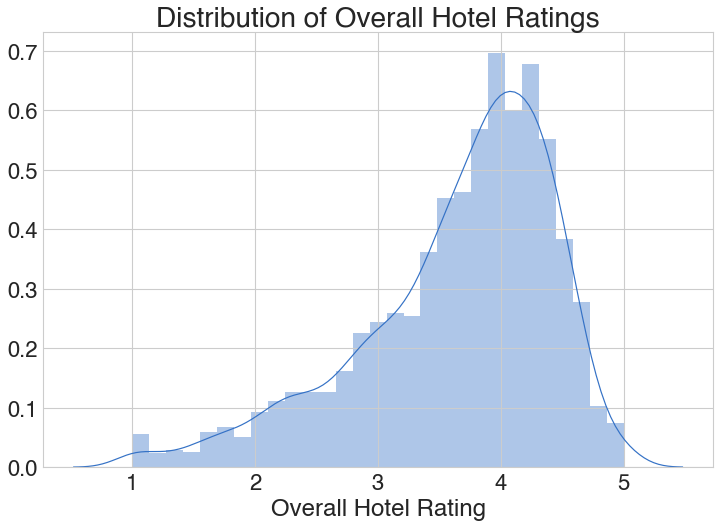

In [117]:
fig, ax = plt.subplots(figsize=(12,8))
fig, ax = hlp.plot_hist(df, 'overall_ratingsource', fig, ax)
ax.set_title('Distribution of Overall Hotel Ratings', size=BIGGEST_SIZE)
# ax.set_ylabel('blah')
ax.set_xlabel('Overall Hotel Rating')
fig.savefig('../images/hist_ratings_overall')

Text(0.5, 1.0, 'Count of Hotels per City')

Text(0, 0.5, 'Count of Hotels')

Text(0.5, 0, 'City')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

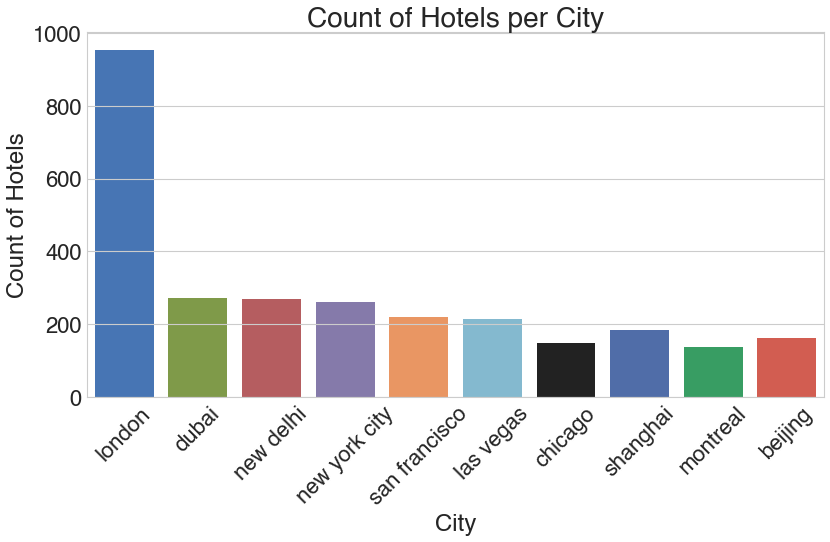

In [118]:
fig, ax = plt.subplots(figsize=(12,8))
plot = sns.countplot(data=df, x='city', ax=ax)
ax.set_title('Count of Hotels per City', size=BIGGEST_SIZE)
ax.set_ylabel('Count of Hotels')
ax.set_xlabel('City')
plt.xticks(rotation=45)
fig.tight_layout()
fig.savefig('../images/ctplt_hotels_byCity')

In [48]:
df.groupby('city').count()['doc_id']

city
beijing          161
chicago          149
dubai            272
las vegas        214
london           954
montreal         137
new delhi        270
new york city    260
san francisco    221
shanghai         183
Name: doc_id, dtype: int64

# Load & Merge Text Files with User Reviews

In [49]:
cities = sorted(list(df_all_cities_cleaned['city'].unique()))
cities

['beijing',
 'chicago',
 'dubai',
 'las vegas',
 'london',
 'montreal',
 'new delhi',
 'new york city',
 'san francisco',
 'shanghai']

In [50]:
len(cities)

10

In [51]:
csv_filenames

['dubai.csv',
 'new-delhi.csv',
 'new-york-city.csv',
 'san-francisco.csv',
 'las-vegas.csv',
 'chicago.csv',
 'shanghai.csv',
 'montreal.csv',
 'beijing.csv',
 'london.csv']

In [52]:
folders = sorted([name.replace('.csv', '') for name in csv_filenames])
folders

['beijing',
 'chicago',
 'dubai',
 'las-vegas',
 'london',
 'montreal',
 'new-delhi',
 'new-york-city',
 'san-francisco',
 'shanghai']

In [53]:
len(folders)

10

## Test reading a text file with user reviews to a dataframe

In [54]:
# Test with first file from las-vegas folder

test_folder = '../data/OpinRankDatasetWithJudgments/hotels/data/las-vegas/'
text_files = hlp.find_filenames(test_folder)
# len(text_files)
text_file = text_files[0]
file_dir = test_folder + text_file
# file_dir
text_file_df = pd.read_csv(file_dir, sep='\t', encoding = "ISO-8859-1", index_col=False, header=None, names=['Date', 'Review Title', 'Review Content'])
text_file_df.head()

,Date,Review Title,Review Content
0,Nov 17 2009,Don't eat here!,We stopped by the Resort for lunch and to chec...
1,Oct 12 2009,unbearable,We live in Vegas and wanted to find a weekend ...
2,Oct 8 2009,Not bad for the price...,We stayed at this hotel for just a weekend awa...
3,Sep 22 2009,To Be Married....Don't @ Mt Charleston!,Getting married at Mt Charleston......DON'T DO...
4,Sep 19 2009,Terrible food,the food was terrible. The lemonade tasted lik...


In [55]:
# Add doc_id col to join with main df
text_file_df['doc_id'] = text_file
text_file_df.head()

,Date,Review Title,Review Content,doc_id
0,Nov 17 2009,Don't eat here!,We stopped by the Resort for lunch and to chec...,usa_nevada_las-vegas_the_resort_on_mount_charl...
1,Oct 12 2009,unbearable,We live in Vegas and wanted to find a weekend ...,usa_nevada_las-vegas_the_resort_on_mount_charl...
2,Oct 8 2009,Not bad for the price...,We stayed at this hotel for just a weekend awa...,usa_nevada_las-vegas_the_resort_on_mount_charl...
3,Sep 22 2009,To Be Married....Don't @ Mt Charleston!,Getting married at Mt Charleston......DON'T DO...,usa_nevada_las-vegas_the_resort_on_mount_charl...
4,Sep 19 2009,Terrible food,the food was terrible. The lemonade tasted lik...,usa_nevada_las-vegas_the_resort_on_mount_charl...


In [56]:
# Reorder cols so doc_id is moved to be first
cols = text_file_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
text_file_df = text_file_df[cols]
text_file_df.head()

,doc_id,Date,Review Title,Review Content
0,usa_nevada_las-vegas_the_resort_on_mount_charl...,Nov 17 2009,Don't eat here!,We stopped by the Resort for lunch and to chec...
1,usa_nevada_las-vegas_the_resort_on_mount_charl...,Oct 12 2009,unbearable,We live in Vegas and wanted to find a weekend ...
2,usa_nevada_las-vegas_the_resort_on_mount_charl...,Oct 8 2009,Not bad for the price...,We stayed at this hotel for just a weekend awa...
3,usa_nevada_las-vegas_the_resort_on_mount_charl...,Sep 22 2009,To Be Married....Don't @ Mt Charleston!,Getting married at Mt Charleston......DON'T DO...
4,usa_nevada_las-vegas_the_resort_on_mount_charl...,Sep 19 2009,Terrible food,the food was terrible. The lemonade tasted lik...


In [57]:
curr_city_dfs = []
for name in csv_filenames:
    dfs.append(pd.read_csv(data_dir + name))

In [58]:
df_all_cities_cleaned_wreviews = df_all_cities_cleaned.copy()

In [59]:
df_all_cities_cleaned_wreviews['doc_id'] = df_all_cities_cleaned_wreviews['doc_id'].str.replace(' ', '_')

In [60]:
folders = ['san-francisco'] # test only one folder
for folder in folders:
    folder_dir = data_dir + folder + '/'
#     print(folder_dir)
    curr_city_dfs = []
    # go inside folder & get text file names
    text_files = hlp.find_filenames(folder_dir)
    # for each text file in folder:
    for text_file in text_files:
        # read each text file
        text_file_df = pd.read_csv(file_dir, sep='\t', encoding = "ISO-8859-1", index_col=False, header=None, names=['Date', 'Review Title', 'Review Content'])
        text_file = text_file.replace(' ' , '_')
        doc_id = text_file.replace(folder + '_' , folder + '|')
        [_, doc_id] = doc_id.split('|', 1)
#         print(doc_id)
        text_file_df['doc_id'] = doc_id
        cols = text_file_df.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        text_file_df = text_file_df[cols]
        curr_city_dfs.append(text_file_df)
    # concatentate all dfs for current city
    df_curr_city_reviews = pd.concat(curr_city_dfs, ignore_index=True)
    # merge reviews from text file with dataframe by doc_id = text file name
    df_all_cities_cleaned_wreviews = pd.merge(df_all_cities_cleaned_wreviews, df_curr_city_reviews, how='left', on='doc_id')

ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
df_all_cities_cleaned_wreviews.head()

In [ ]:
df_all_cities_cleaned_wreviews.tail()

# Appendix

# Load & Merge Extra CSV Data

In [ ]:
# extra = pd.read_csv('../data/ratingswithcontextandmetadata.csv', sep='|', encoding = "ISO-8859-1")